<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Hands-on Lab: Introduction to API

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function, you don't have to know how the API works, only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library in the context of an API, we will also review a basic REST API.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#Pandas-is-an-API">Pandas is an API</a></li>
<li><a href="#REST-APIs">REST APIs</a></li>
<li><a href="#Quiz">Quiz</a></li>

</div>

<hr>


## Pandas is an API


Pandas is actually set of software components , much of  which is not even written in Python.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


You create a dictionary, this is just data.


In [2]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the dataframe constructor, in API lingo this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [3]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width="800," align="center" alt="logistic regression block diagram">


When you call the method `head` the dataframe communicates with the API displaying the first few rows of the dataframe.


In [4]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method `mean`, the API will calculate the mean and return the value.


In [5]:
df.mean()

a    21.0
b    22.0
dtype: float64

## REST APIs


<p>Rest APIs function by sending a <b>request</b>, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API to determine the number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication. </p>


It's quite simple to use the nba api to make a request for a specific team. We don't require a JSON, all we require is an id. This information is stored locally in the API. We import the module `teams`.


In [6]:
!pip install nba_api


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [8]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    dictionary = {key:[] for key in keys}
    
    for dic in list_dict:
        for key, value in dic.items():
            dictionary[key].append(value)
    return dictionary


The method <code>get_teams()</code> returns a list of dictionaries.


In [9]:
nba_teams = teams.get_teams()
nba_teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

The dictionary key id has a unique identifier for each team as a value. Let's look at the first three elements of the list:


In [10]:
nba_teams[0:3]


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys, the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.


In [11]:
dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:


In [12]:
# df_warriors=df_teams[df_teams['nickname']=='Warriors']
# df_warriors
df_warriors = df_teams[df_teams['nickname'] == 'Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


We can use the following line of code to access the first column of the DataFrame:


In [13]:
id_warriors = df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

1610612744

The function "League Game Finder " will make an API call, it's in the module <code>stats.endpoints</code>.


In [14]:
from nba_api.stats.endpoints import leaguegamefinder

In [15]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commented out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.\
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>game finder</code>.


We can see the json file by running the following line of code.


In [16]:
gamefinder.get_json()



The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative, the Warriors lost by that many points, if the value is positive, the warriors won by that amount of points. The column <code>MATCHUP</code> has the team the Warriors were playing, GSW stands for Golden State Warriors and TOR means Toronto Raptors. <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.


In [17]:
import json
a = gamefinder.get_json()
#convert json to python dictionary 'LeagueGameFinderResults',

dictionary  = json.loads(a)
#step1 - find keys in dictionary to see what's there? 
dictionary.keys()
# keys in dictioary variable ['resource', 'parameters', 'resultSets']


dict_keys(['resource', 'parameters', 'resultSets'])

In [18]:
#step2  acessing key : 'resultSets' to see what it hold.
dictionary['resultSets']

[{'name': 'LeagueGameFinderResults',
  'headers': ['SEASON_ID',
   'TEAM_ID',
   'TEAM_ABBREVIATION',
   'TEAM_NAME',
   'GAME_ID',
   'GAME_DATE',
   'MATCHUP',
   'WL',
   'MIN',
   'PTS',
   'FGM',
   'FGA',
   'FG_PCT',
   'FG3M',
   'FG3A',
   'FG3_PCT',
   'FTM',
   'FTA',
   'FT_PCT',
   'OREB',
   'DREB',
   'REB',
   'AST',
   'STL',
   'BLK',
   'TOV',
   'PF',
   'PLUS_MINUS'],
  'rowSet': [['22024',
    1610612744,
    'GSW',
    'Golden State Warriors',
    '1322400012',
    '2024-07-10',
    'GSW vs. SKT',
    'W',
    240,
    91,
    28,
    62,
    0.452,
    10,
    31,
    0.323,
    25,
    32,
    0.781,
    5,
    27,
    32,
    20,
    8,
    2,
    15,
    17,
    1.0],
   ['22024',
    1610612744,
    'GSW',
    'Golden State Warriors',
    '1322400006',
    '2024-07-07',
    'GSW vs. LAL',
    'W',
    201,
    92,
    34,
    80,
    0.425,
    9,
    30,
    0.3,
    15,
    25,
    0.6,
    14,
    41,
    55,
    19,
    7,
    8,
    15,
    22,
    24.0

In [19]:
#step3
#there is a key named 'headers'. Let's extract the list contains headers
resultsets_dict = dictionary['resultSets'][0]
headers_list =  resultsets_dict['headers']
headers_list

['SEASON_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP',
 'WL',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PLUS_MINUS']

In [20]:
#making dictionary to fit pandas framework
headers_list
dictna = {header:[] for header in headers_list}
keys_list = [key for key in dictna.keys()]
keys_list

['SEASON_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP',
 'WL',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PLUS_MINUS']

In [21]:
#check key of results_list again to check rows_value 
records_list = resultsets_dict['rowSet']
records_list


[['22024',
  1610612744,
  'GSW',
  'Golden State Warriors',
  '1322400012',
  '2024-07-10',
  'GSW vs. SKT',
  'W',
  240,
  91,
  28,
  62,
  0.452,
  10,
  31,
  0.323,
  25,
  32,
  0.781,
  5,
  27,
  32,
  20,
  8,
  2,
  15,
  17,
  1.0],
 ['22024',
  1610612744,
  'GSW',
  'Golden State Warriors',
  '1322400006',
  '2024-07-07',
  'GSW vs. LAL',
  'W',
  201,
  92,
  34,
  80,
  0.425,
  9,
  30,
  0.3,
  15,
  25,
  0.6,
  14,
  41,
  55,
  19,
  7,
  8,
  15,
  22,
  24.0],
 ['22024',
  1610612744,
  'GSW',
  'Golden State Warriors',
  '1322400002',
  '2024-07-06',
  'GSW vs. MIA',
  'W',
  241,
  105,
  42,
  75,
  0.56,
  13,
  31,
  0.419,
  8,
  11,
  0.727,
  7,
  43,
  50,
  23,
  7,
  10,
  15,
  16,
  39.6],
 ['52023',
  1610612744,
  'GSW',
  'Golden State Warriors',
  '0052300131',
  '2024-04-16',
  'GSW @ SAC',
  'L',
  239,
  94,
  33,
  80,
  0.413,
  10,
  32,
  0.313,
  18,
  23,
  0.783,
  8,
  34,
  42,
  19,
  5,
  3,
  16,
  17,
  -24.0],
 ['22023',
  16106

In [22]:
#loading each element into their position
records_list
keys_list = [key for key in dictna.keys()]
keys_list

['SEASON_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP',
 'WL',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PLUS_MINUS']

In [23]:
for record in records_list:
    i=0
    while i < len(record):
        dictna[keys_list[i]].append(record[i])
        i += 1
#(dictna là 1 dictionary hold key:list các value của các key tạo ở trên)        
# mỗi vòng lập nó sẽ lấy ra 1 list từ records_list sau đó thực hiện while loop với biến i chạy từ 0 đến < len(record)
# khi i = 0 thì nó sẽ lấy dữ liệu từ biến keys_list[i] --> để return ra value của key đó và append record[i] vào
# cứ hết lỗi lần loop thì sẽ trải qa lần loop ở record tiếp theo và cứ thế append value vào list mà key đó hold
# check dictn
dictna

{'SEASON_ID': ['22024',
  '22024',
  '22024',
  '52023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '22023',
  '12023',
  '12023',
  '12023',
  '12023

In [24]:
#get dataframe using pandas
df = pd.DataFrame(dictna)
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,1322400012,2024-07-10,GSW vs. SKT,W,240,91,...,0.781,5.0,27.0,32.0,20,8,2,15,17,1.0
1,22024,1610612744,GSW,Golden State Warriors,1322400006,2024-07-07,GSW vs. LAL,W,201,92,...,0.600,14.0,41.0,55.0,19,7,8,15,22,24.0
2,22024,1610612744,GSW,Golden State Warriors,1322400002,2024-07-06,GSW vs. MIA,W,241,105,...,0.727,7.0,43.0,50.0,23,7,10,15,16,39.6
3,52023,1610612744,GSW,Golden State Warriors,0052300131,2024-04-16,GSW @ SAC,L,239,94,...,0.783,8.0,34.0,42.0,19,5,3,16,17,-24.0
4,22023,1610612744,GSW,Golden State Warriors,0022301198,2024-04-14,GSW vs. UTA,W,239,123,...,0.826,12.0,30.0,42.0,35,10,6,9,14,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,21983,1610612744,GOS,Golden State Warriors,0028300048,1983-11-05,GOS vs. NYK,W,240,102,...,0.711,25.0,18.0,43.0,20,16,4,17,27,NaN
3703,21983,1610612744,GOS,Golden State Warriors,0028300040,1983-11-03,GOS @ UTH,L,240,112,...,0.880,27.0,26.0,53.0,22,11,4,19,31,NaN
3704,21983,1610612744,GOS,Golden State Warriors,0028300029,1983-11-01,GOS @ KCK,L,240,114,...,0.750,12.0,18.0,30.0,29,15,3,16,28,NaN
3705,21983,1610612744,GOS,Golden State Warriors,0028300013,1983-10-29,GOS vs. POR,W,240,97,...,0.725,12.0,31.0,43.0,21,9,1,16,37,NaN


You can download the dataframe from the API call for Golden State and run the rest like a video.


In [25]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [26]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can create two dataframes, one for the games that the Warriors faced the raptors at home, and the second for away games.


In [27]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column <code>PLUS_MINUS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [28]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [29]:
games_away['PLUS_MINUS'].mean()


-0.6071428571428571

We can plot out the <code>PLUS MINUS</code> column for the dataframes <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.


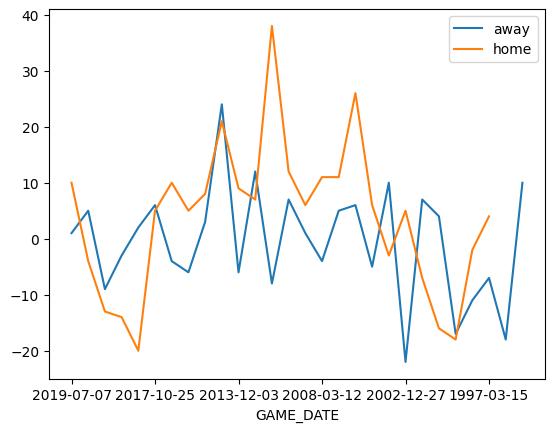

In [53]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

## Quiz


Calculate the mean for the column <code>PTS</code> for the dataframes <code>games_home</code> and <code> games_away</code>:


In [55]:
# Write your code below and press Shift+Enter to execute
games_home['PTS'].mean()
games_away['PTS'].mean()

102.96428571428571